<a href="https://colab.research.google.com/github/Bailior0/base/blob/master/AGI2024_HomeWorkAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Welcome to your homework assignment for the AGI🧠 class! While the lessons in class focused on the bigger picture of Artificial General Intelligence (AGI) and its implications, this homework aims to provide a more hands-on experience. Here, you'll explore the foundational models of today's AI language tasks – transformers. Unlike the broader discussions from class, this notebook will guide you through practical demonstrations of how transformers work, specifically focusing on Large Language Models (LLMs) and Retrieval-Augmented Generation (RAG). By the end of this assignment, you’ll have a practical understanding of how transformers process and understand text and how they can be applied to real-world scenarios.

> **💡 Note**: Feel free to modify the code throughout the notebook to experiment and gain a deeper understanding of how different parameters and components of transformers work. Change values, add new prompts, or test out different models.


The notebook is divided into five parts, you'll have to complete an assignment in each section (marked by "📖" for clarity):

1. **Tokenization**:  
   We'll start by exploring how a transformer "sees" text. You'll learn about the concept of tokenization and experiment with different tokenizers to see how the same text can be broken down in various ways. Understanding tokenization is crucial because it's the first step in how a transformer processes language.

2. **Embedding Text**:  
   Next, we'll look at how different models convert text into embeddings – numerical representations that capture the meaning and context of the text. You'll see how the same sentence can produce different embeddings depending on the model used, giving insights into how models "understand" language.

3. **Attention Mechanism**:  
   A key aspect of transformers is their ability to pay attention to different parts of a sentence while processing it. We'll explore attention maps that visually demonstrate how different models focus on certain words in context, helping to explain why transformers are so effective at language tasks.

4. **Text Generation**:  
   In this section, you'll explore how transformers can generate text based on a given prompt. The process of text generation relies heavily on sampling from a probability distribution over possible next tokens, which can be influenced by a parameter called **temperature**. We'll experiment with different temperature values to see how they affect the creativity and coherence of the generated text.


5. **Working with a RAG Model for Question Answering**:  
   In this final section, you'll be given access to a model that uses RAG – a technique that allows it to retrieve relevant information from an external database to answer questions more accurately. Your task will be to create a set of questions, compile related texts to feed into a vector database, and then compare the model's answers with and without access to this database.

---

> **⚠️ Important:**  
> Please make sure to run the cells in order as you go through the notebook. This will ensure that all the necessary variables and models are correctly initialized and ready for the subsequent sections. The notebook also requires some prior setup, read the cells in the introduction section carefully!

> If you want to save your work you need to save a copy of this notebook into your google drive. ("File" -> "Save a copy in Drive")

---


## 🚀 **Using Hardware Acceleration for Faster Processing**

Working with transformers can be computationally heavy, especially when running models on large texts. Google Colab provides **free access to GPU acceleration** for all users with a Google account, which can significantly speed up your computations. We strongly recommend enabling the GPU for this notebook to improve performance and reduce execution time.

1. At the top of the Colab interface, click on **"Runtime"** in the menu.
2. Select **"Change runtime type"** from the dropdown.
3. In the **"Hardware accelerator"** section, choose **"GPU"** from the dropdown options.
4. Click **"Save"** to apply the changes.

To check your current usage and limitations, go to **"Runtime"** > **"View resources"** from the same dropdown. This will give you insights into your current access and remaining limits for GPU use.

> If GPU access is limited or unavailable, you can still run the notebook using a CPU. However, keep in mind that the processing times will be longer.

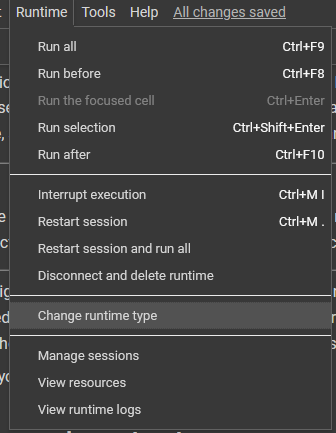

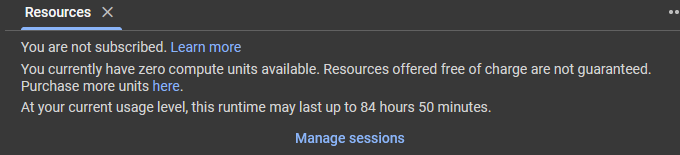

---

## **🤗 Using Hugging Face Services**

This homework assignment relies on services provided by [Hugging Face 🤗](https://huggingface.co/). To use the code in this notebook, you'll need to register for a Hugging Face account and generate a **"Read" Access Token**.

### **How to Create Your Access Token**

1. **Register or Log in**: Go to [Hugging Face](https://huggingface.co/) and either register for a new account or log in to your existing one.
2. **Request access for [Mistral-7B-Instruct-v0.3 ](https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.3)**: To access the mistral models, you need to agree to their privacy policy. Open the repository and click **"Agree and access repository"**
3. **Create a New Token**: Navigate to [your token settings](https://huggingface.co/settings/tokens).
   - Click on "+ Create New Token".
   - Set the **Token Type** to **"Read"**.
   - Copy the generated token, as you'll need it for the next step.

### **Setting Your Token in Colab**

To use your access token in this Colab notebook, follow the instructions below:

1. Open the "Notebook access" section in the Colab interface.
2. Add your Hugging Face token with the secret name **"HF_TOKEN"**, as shown in the image below.

> **Important:** After setting the token, make sure to **restart the Colab session** for the token to be properly recognized.

---

Once the token is set up, you'll be able to access and use Hugging Face services seamlessly within this notebook.


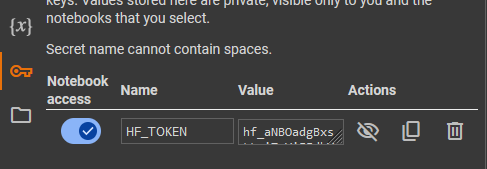

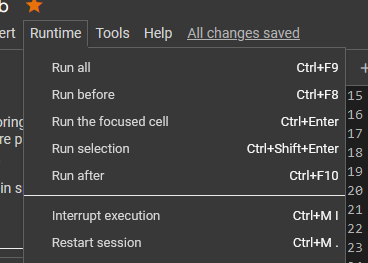

## **Installing Packages**

In [16]:
# Install necessary packages
!pip install umap-learn adjustText datasets faiss-cpu faiss-gpu
!pip install unstructured unstructured[pdf]
!pip install langchain langchain_community langchain_huggingface sentence_transformers
!pip install --upgrade nltk

# Make data folder for documents
!mkdir data

# Restart runtime optional, even if install messages prompt you to do it

mkdir: cannot create directory ‘data’: File exists


# **Transformer Basics**

In [17]:
# General settings
import seaborn as sns
sns.set("paper", "whitegrid")

from transformers import logging
logging.set_verbosity_error()

import warnings
warnings.filterwarnings("ignore")

## **Tokenization**


Tokenization is a fundamental step in text processing for any transformer-based model. In essence, it involves breaking down a piece of text into smaller units called **tokens** – which could be words, characters, or sub-word pieces – that a model can understand and work with. Each tokenizer has its own way of dividing text, which can affect how models interpret and generate language.

### **What is Tokenization and Why Does it Matter?**

Imagine that a model has to make sense of an entire novel. Before it can analyze or generate text, the model needs to break down this long, complex sequence of characters into manageable pieces. Tokenization is the process that enables this by converting text into tokens, which are then mapped to numerical values that the model can process.

The tokenization method chosen can significantly impact a model's ability to learn and generalize. Some tokenizers split based on whitespace, punctuation, or characters, while others use more sophisticated techniques, like **WordPiece** or **Byte-Pair Encoding (BPE)**, to handle sub-word components. For instance, a tokenizer might break the word "unbelievable" into ["un", "believ", "able"], allowing the model to understand variations like "believe" and "believer" more effectively.

Complex tokenizers that efficiently handle subwords (e.g., BPE) **require training** on a large text corpus. During training, the tokenizer identifies frequently occurring segments and merges them into single tokens.

### **Tokenization Techniques in Practice**

The code example below demonstrates tokenization in action, visualizing how each tokenizer processes a piece of text. Here’s a breakdown of what we do:

1. **Sample Texts**: We have selected excerpts in English and French to showcase how tokenizers handle different languages.
2. **Tokenizers**: We use tokenizers associated with popular transformer models (e.g., BERT, GPT-2, RoBERTa) to tokenize the same text.
3. **Visualizing Tokenization**: After tokenizing the text, we visualize the tokens produced by each tokenizer, helping you understand the differences in how models break down and interpret text.


In [18]:
#@title Tokenizer visualization code

# Imports for the tokenization demonstration
from transformers import BertTokenizer, GPT2Tokenizer, RobertaTokenizer, LlamaTokenizer, BloomTokenizerFast, T5Tokenizer
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from colorsys import hsv_to_rgb


# Helper functions for visualizing tokenizations
# Function to check if a token is a subword or special token
def is_subword_or_special(token, tokenizer_name, prev_token=None):
    tokenizer_name = tokenizer_name.lower()

    # Identify tokenizer type
    is_bert = tokenizer_name == 'bert'
    is_roberta = tokenizer_name in ['roberta', 'bloom', 'gpt2']
    is_t5 = tokenizer_name in ['t5', 'llama']

    # General rule for punctuation or single non-alphanumeric characters
    if token in '.,!?:;"\'-()[]{}' or (len(token) == 1 and not token.isalnum()):
        return True

    # Handling contractions or tokens with apostrophes
    if prev_token and prev_token.endswith("'") and token in ["t", "d", "ll", "ve", "re", "s"]:
        return True

    if token.startswith("'"):
        return True

    # Tokenizer-specific checks for subwords
    if is_bert:
        return token.startswith("##")
    elif is_roberta:
        return not token.startswith("Ġ")
    elif is_t5:
        # t5 optimizations ?
        if prev_token == "_" or token in ['a']:
            return False
        return not token.startswith("▁")

    return False

# Function to get token positions in the text
def get_token_positions(text, tokens, tokenizer_name):
    positions = []
    start = 0
    prev_token = None
    text_lower = text.lower() if tokenizer_name.lower() == "bert" else text

    for token in tokens:
        # Handle newline token "Ċ" or special tokens
        if token in ["Ċ", "<0x0A>"]:
            positions.append((-1, -1, token, True))  # Mark as special for line breaks
            continue

        token_clean = token.lstrip("##Ġ▁")
        idx = text_lower.find(token_clean, start)

        if not token_clean:
            continue

        if idx != -1:
            is_special = is_subword_or_special(token, tokenizer_name, prev_token)
            positions.append((idx, idx + len(token_clean), token, is_special))
            start = idx + len(token_clean)
        else:
            # Handle fallback case where token is not found in text
            positions.append((start, start + len(token_clean), token, True))
            start += len(token_clean)

        prev_token = token

    return positions

# Function to assign unique colors to tokens
def assign_colors(tokens):
    unique_tokens = sorted(list(set(tokens)))
    num_tokens = len(unique_tokens)
    hsv_tuples = [(x / num_tokens, 0.5, 1.0) for x in range(num_tokens)]
    rgb_tuples = [hsv_to_rgb(*hsv) for hsv in hsv_tuples]
    return {token: (r, g, b) for token, (r, g, b) in zip(unique_tokens, rgb_tuples)}

# Function to create span for each token
def create_span(token, token_text, color, is_special=False, current_line_length=None, transparency=0.3):
    margin = "-3px" if is_special else "3px"
    if current_line_length == 0:
        margin = "3px"

    return f'''
    <span style="
        background-color:rgba({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}, {transparency});
        border-radius:2px;
        padding:2px;
        margin:2px 0px 2px {margin};
        display:inline-flex;
        line-height:1.5;
    " title="Token: {token}">{token_text}</span>'''

# Function to highlight text with correct spacing
def highlight_text_with_correct_spacing(text, token_positions, token_colors, line_length=50, transparency=0.3):
    highlighted_text = []
    current_line_length = 0

    for start_idx, end_idx, token, is_special in token_positions:
        if token in ["Ċ", "<0x0A>"]:  # Handle newline tokens
            highlighted_text.append("<br>")
            current_line_length = 0
            continue

        token_text = text[start_idx:end_idx]
        token_length = len(token_text)

        # Add line break if necessary
        if current_line_length + token_length > line_length:
            highlighted_text.append("<br>")
            current_line_length = 0

        # Create a span element for each token
        highlighted_text.append(create_span(token, token_text, token_colors[token], is_special, current_line_length, transparency))
        current_line_length += token_length

    return "".join(highlighted_text)

# Function to visualize tokenizer output
def visualize_tokenizer(text, tokens, tokenizer_name, line_length=50, transparency=0.3):
    positions = get_token_positions(text, tokens, tokenizer_name)
    token_colors = assign_colors(tokens)
    highlighted_html = highlight_text_with_correct_spacing(text, positions, token_colors, line_length, transparency)

    summary = f"Tokenizer: {tokenizer_name.capitalize()}"
    display(HTML(f"<h3>{summary}</h3><p>{highlighted_html}</p>"))

# Main function to display tokenizer comparisons
def display_tokenizer_comparisons(text, tokenizers, line_length=50, transparency=0.3):
    for tokenizer_name, tokens in tokenizers.items():
        visualize_tokenizer(text, tokens, tokenizer_name, line_length, transparency)


def display_tokenizer(tokenizer_name, language):
  tokenizer = tokenizer_dict[tokenizer_name]
  text = sample_texts[language]
  # Tokenize text
  tokenized_text =  tokenizer.tokenize(text)
  # Display tokenized text
  visualize_tokenizer(text, tokenized_text, tokenizer_name, line_length=60, transparency=0.5)

Feel free to modify the displayed tokenizers or sample texts to see how the tokenization behaves.

In [19]:
# Initialize tokenizers
tokenizer_dict = {
    "BERT": BertTokenizer.from_pretrained('bert-base-uncased'),
    "GPT2": GPT2Tokenizer.from_pretrained('gpt2'),
    "RoBERTa": RobertaTokenizer.from_pretrained('roberta-base'),
    "LLaMA": LlamaTokenizer.from_pretrained('mistralai/Mistral-7B-Instruct-v0.3'),
    "Bloom": BloomTokenizerFast.from_pretrained('bigscience/bloom-560m'),
    "T5": T5Tokenizer.from_pretrained('t5-small'),
}

# Define sample texts for different languages
sample_texts = {
    'english': """I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. Do you understand this feeling? This breeze, which has travelled from the regions towards which I am advancing, gives me a foretaste of those icy climes.""",
    'french':"""Je suis déjà loin au nord de Londres; et, quand je me promène dans les rues de Saint-Pétersbourg, je sens se jouer sur mes joues la brise froide du nord qui me resserre les nerfs et me remplit de volupté. Comprenez-vous cette sensation? Cette brise, qui est venue des régions à travers lesquelles je m'avance, me donne un avant-goût de ces climats glacés."""
}

# Display tokenizers
display_tokenizer('RoBERTa', 'english')
display_tokenizer('LLaMA', 'english')
display_tokenizer('LLaMA', 'french')

### 📖 Tokenization Assigment

What is the main difference between the french and english tokenizations? What could be the reason for this?

In [20]:
# The main difference between the French and English tokenizations lies in how tokens are divided, particularly when it comes to handling punctuation, contractions, and special characters.
# The main differences arise due to variations in the structure and orthography of the two languages, compounded by the biases and design of the tokenizer's training data and methods.

## Embedding


After tokenization, the next step in processing text for transformers is **embedding**. While tokenization breaks down a text into smaller parts (tokens), embeddings convert these tokens into high-dimensional numerical vectors that capture their meaning, context, and relationships.

### **From Text to Embeddings: The Process**

To understand how embeddings work, let’s break down the transformation process:
1. **Text** → **Tokens**: The text is split into tokens using a tokenizer.
2. **Tokens** → **Integers**: Each token is mapped to a unique integer ID.
3. **Integers** → **High-Dimensional Vectors**: These integer IDs are then transformed into vectors of high-dimensional space, called embeddings, that represent their semantic properties.

These embeddings allow the model to "understand" the context and meaning behind the words by finding patterns and relationships in this vector space. Each token has its unique vector representation, and words with similar meanings or contexts will have similar vectors.

### **Visualizing Embeddings**

In this section, we'll explore how different transformer models (e.g., GPT-2, RoBERTa, etc.) create embeddings for the same sample text. To visualize the embeddings effectively:
- We use **UMAP (Uniform Manifold Approximation and Projection)**, a dimensionality reduction technique that helps us project the high-dimensional embeddings into a 2D space for visualization.
- We then apply **k-means clustering** to identify clusters of tokens with similar embeddings, which often correspond to semantically related words.

The visualization helps reveal how models group similar tokens in the embedding space, offering a glimpse into how transformers "understand" the relationships between words.

To learn more about UMAP and how it reduces dimensionality for visualization, you can visit the [UMAP documentation](https://umap-learn.readthedocs.io/en/latest/).


In [21]:
#@title Embedding visualization code

# Import packages for the Embedding section
import torch
import umap
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from transformers import AutoTokenizer, AutoModel
from adjustText import adjust_text
import numpy as np
import gc

# Helper function for plotting the embedding space
def visualize_embedding(model_name):
    # Initialize tokenizer and model
    model_path, tokenizer_class = models_tokenizers[model_name]
    tokenizer = tokenizer_class.from_pretrained(model_path)
    model = AutoModel.from_pretrained(model_path)

    # Tokenize and convert to input IDs
    tokens = list(set(tokenizer.tokenize(text)))
    input_ids = tokenizer.convert_tokens_to_ids(tokens)
    input_tensor = torch.tensor([input_ids], device=device)  # Create tensor with batch dimension

    # Get embeddings from the model
    with torch.no_grad():
        embedding_layer = None
        if model_name == "GPT2":
            embedding_layer = model.wte
        elif model_name =="Mistral":
            embedding_layer = model.embed_tokens
        elif model_name =="Bloom":
            embedding_layer = model.word_embeddings
        elif model_name =="T5":
            embedding_layer = model.shared
        else:
            embedding_layer = model.embeddings.word_embeddings

        embedding_layer = embedding_layer.to(device)
        token_embeddings = embedding_layer(input_tensor).squeeze(0)

    # Reduce dimensions using UMAP
    reducer = umap.UMAP()
    reduced_embeddings = reducer.fit_transform(token_embeddings.cpu().numpy())

    # Apply k-means clustering
    n_clusters = 6
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(reduced_embeddings)

    # Define colors for the clusters
    colors = plt.get_cmap('tab10', n_clusters)  # Use a colormap with 'n_clusters' distinct colors

    # Plot the embeddings
    plt.figure(figsize=(10, 10))
    plt.title(model_name)
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1],
                              c=clusters, cmap=colors, alpha=0.7, s=10)
    ax = plt.gca()
    # Initialize a list to store label positions
    texts = []

    # Add text labels with slightly adjusted positions to avoid clutter
    for j, label in enumerate(tokens):
        x, y = reduced_embeddings[j]
        texts.append(ax.text(x, y, label.lstrip("##Ġ▁"), fontsize=9))

    # Use adjust_text to automatically move text and avoid overlaps
    adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

Note, how the model puts semantically similar words close to each other in the embedding space. Feel free to modify to sample text and visualized models

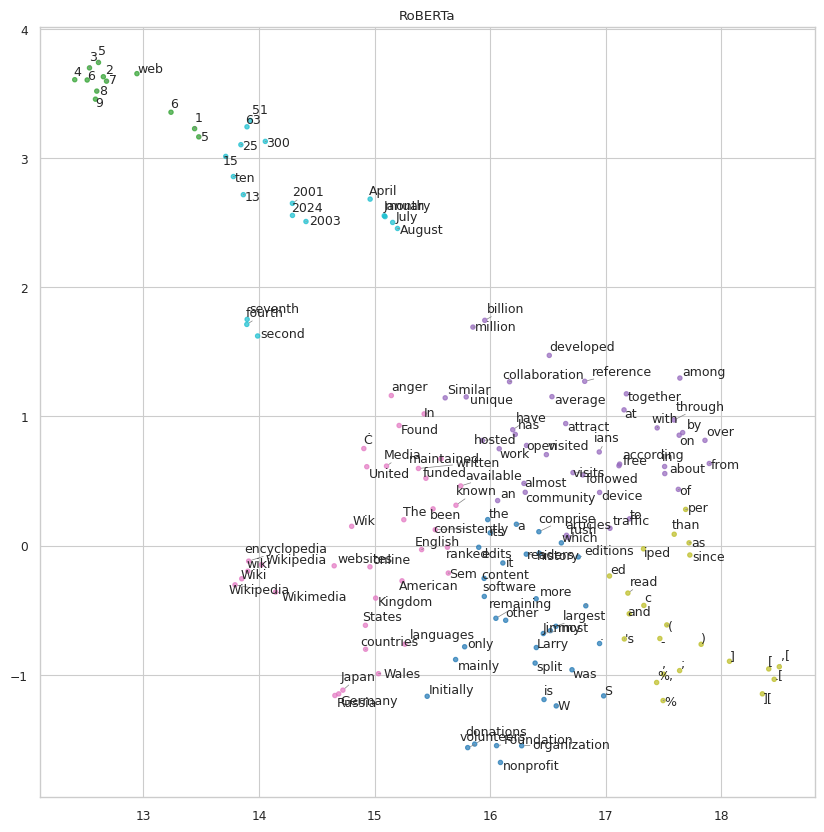

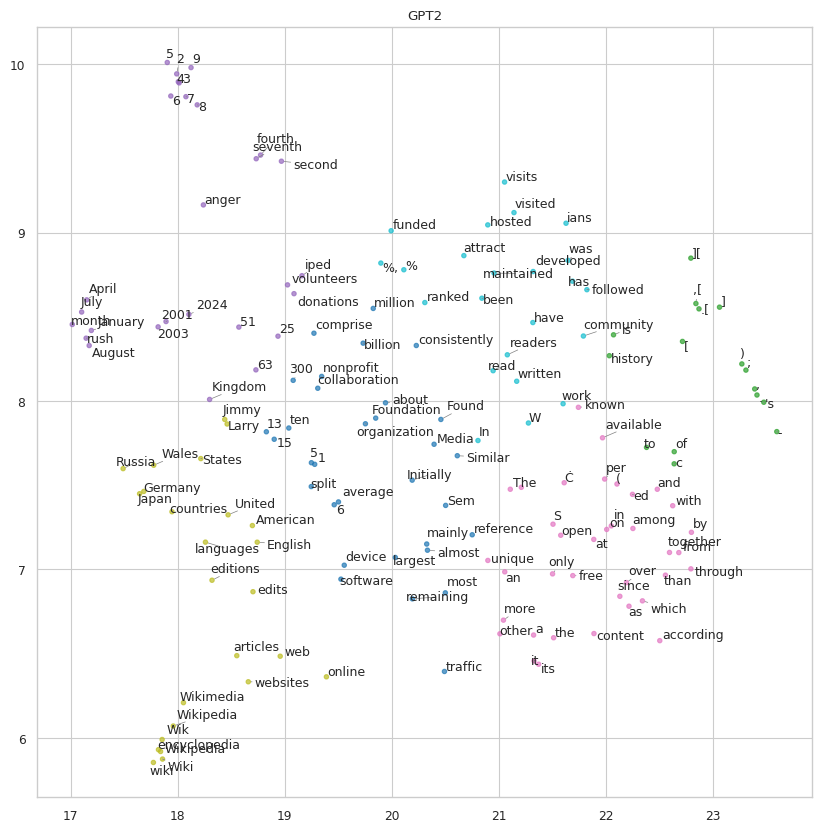

In [22]:
# Use GPU acceleration if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# List of tokenizers and model names
models_tokenizers = {
    "BERT": ("bert-base-uncased", BertTokenizer),
    "GPT2": ("gpt2", GPT2Tokenizer),
    "RoBERTa": ("roberta-base", RobertaTokenizer),
    "Mistral": ("mistralai/Mistral-7B-Instruct-v0.3", LlamaTokenizer),
    "Bloom": ("bigscience/bloom-560m", BloomTokenizerFast),
    "T5": ("t5-small", T5Tokenizer),
}

# Set sample text
text = """Wikipedia[c] is a free content online encyclopedia written and maintained by a community of volunteers, known as Wikipedians, through open collaboration and the wiki software MediaWiki. Wikipedia is the largest and most-read reference work in history,[3][4] and is consistently ranked among the ten most visited websites; as of August 2024, it was ranked fourth by Semrush,[5] and seventh by Similarweb.[6] Founded by Jimmy Wales and Larry Sanger on January 15, 2001, Wikipedia has been hosted since 2003 by the Wikimedia Foundation, an American nonprofit organization funded mainly by donations from readers.[7]
Initially only available in English, editions of Wikipedia in more than 300 other languages have been developed. The English Wikipedia, with its almost 6.9 million articles, is the largest of the editions, which together comprise more than 63 million articles and attract more than 1.5 billion unique device visits and 13 million edits per month (about 5 edits per second on average) as of April 2024.[W 1] In July 2024, over 25% of Wikipedia's traffic was from the United States, followed by Japan at 6.2%, the United Kingdom at 5.8%, Russia at 5.2%, Germany at 5%, and the remaining 51% split among other countries, according to Similarweb.[8] """

# Plot model embeddins
visualize_embedding("RoBERTa")
visualize_embedding("GPT2")

### 📖 Embedding Assigment

What token groups can you see in the embedded space? Are there any tokens you wouldn't expect to see close to each other?

In [23]:
# Token groups: Wikipedia Cluster, Temporal Tokens, Numerical Tokens, Countries, Prepositions, Contextual Groupings
# Unexpected pairings: web and numbers, rush and months

## **Attention**

One of the key innovations behind transformers is their **attention mechanism**. Unlike traditional models that process sequences step by step, transformers use attention to understand relationships between words, allowing the model to capture context over long distances in a sentence. This capability makes transformers highly effective at natural language tasks like translation, summarization, and question-answering.

### **What is Attention?**

At its core, the attention mechanism allows a transformer model to focus on different parts of a sequence while processing each token. For example, when translating a sentence from English to French, attention enables the model to decide which English words are most relevant for each word in the French output.

This mechanism is often referred to as "self-attention" because it lets each word in a sequence pay attention to every other word in the same sequence. By assigning different "weights" or "importance" to words, the model learns to make predictions based on context, improving the overall understanding of the text.

To dive deeper into the theory of attention mechanisms, check out this comprehensive [article on Machine Learning Mastery](https://machinelearningmastery.com/the-transformer-attention-mechanism/). For a highly visual and intuitive explanation, watch this [YouTube video by 3Blue1Brown](https://www.youtube.com/watch?v=eMlx5fFNoYc).

### **Visualizing Attention in Transformers**

In this section, we'll visualize how a transformer model, specifically GPT-2, uses attention to generate text. We will:
1. Use GPT-2 to generate a continuation of a sample input sentence.
2. Extract and visualize attention weights from multiple attention heads and layers.
3. Plot the attention maps to see how different tokens in the sequence attend to one another.


Generated text:
I had seen little of Holmes lately, and I was not sure if he


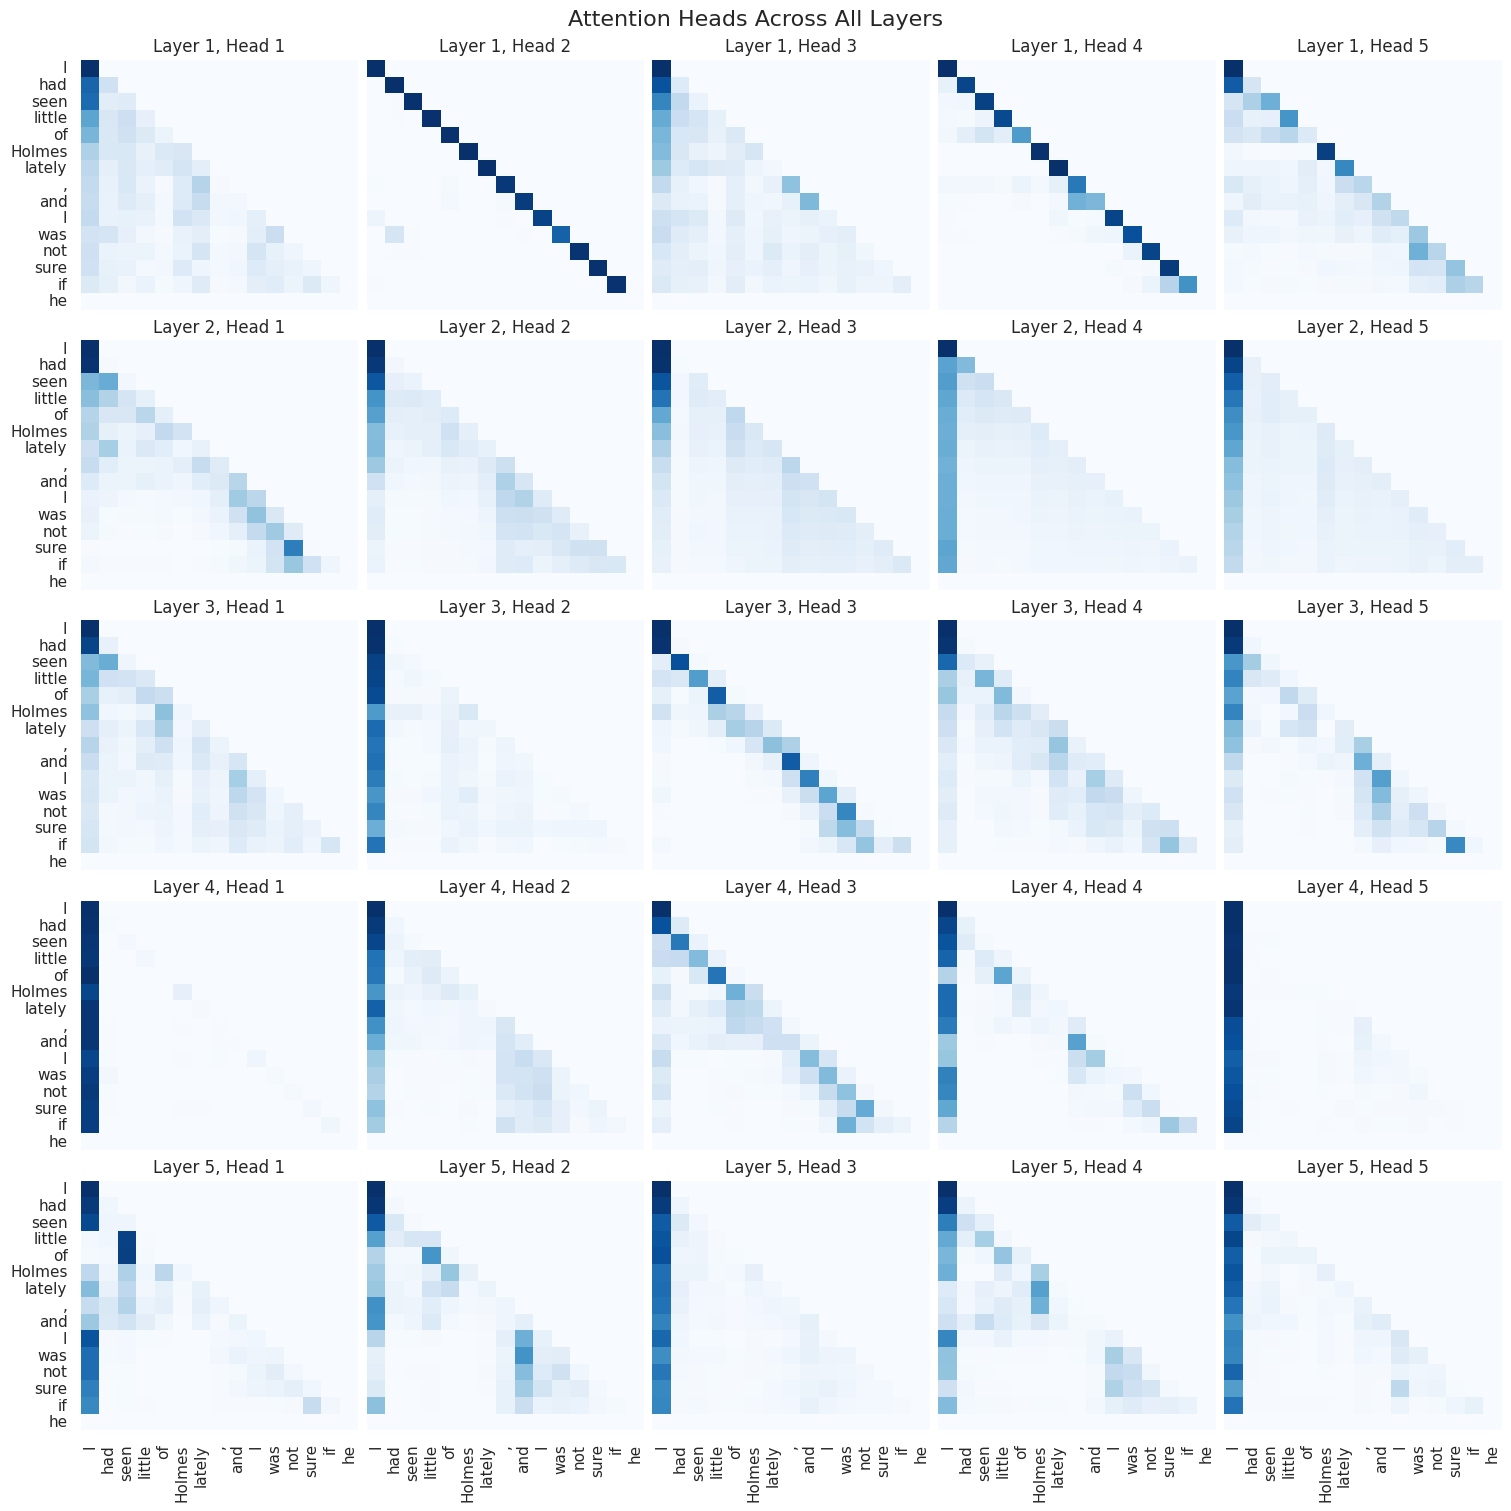

In [24]:
#@title Attention visualization code

# Imports for tokenization and model
import torch
from transformers import GPT2LMHeadModel, AutoTokenizer

# Imports for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure seaborn and matplotlib are set for visualizations
sns.set(style="whitegrid")


# Initialize model and tokenizer
model = GPT2LMHeadModel.from_pretrained('gpt2', output_attentions=True)
tokenizer = AutoTokenizer.from_pretrained('gpt2')

# Encode input
sequence_length = 15
input_text = "I had seen little of Holmes lately"
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# Generate text with attention
outputs = model.generate(
    input_ids, max_length=sequence_length, do_sample=False, output_attentions=True, return_dict_in_generate=True
)

# Get generated tokens
generated_ids = outputs.sequences
generated_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)

print("Generated text:")
print(generated_text)

# Get attentions
attentions = outputs.attentions

# Visualize attentions for the last layer
# last layer attentions shape: (batch_size, num_heads, sequence_length, sequence_length)
last_layer_attentions = attentions[-1][0].detach().numpy()

# Print tokens and show which token attends to which
tokens = tokenizer.convert_ids_to_tokens(generated_ids[0])

# Initialize a tensor to store the concatenated attention matrices
# Shape: (num_layers, num_heads, total_sequence_length, total_sequence_length)
num_layers = len(attentions[0])
num_heads = attentions[0][0].shape[1]
fill_arr = torch.zeros(num_layers, num_heads, sequence_length, sequence_length)

# Iterate over layers and concatenate attention matrices for each step
for layer in range(num_layers):
    last = 0
    for step in range(len(attentions)):
        # Get attention shape: (batch_size, num_heads, seq_len_step, seq_len_step)
        _, num_heads, seq_len_step, seq2_len = attentions[step][layer].shape

        # Fill the corresponding part of the attention matrix
        fill_arr[layer, :, last:last + seq_len_step, :seq2_len] = attentions[step][layer][0]

        # Update the starting index for the next step
        last += seq_len_step

# Token list from the final generated sequence
tokens = [token.lstrip('Ġ') for token in tokenizer.convert_ids_to_tokens(generated_ids[0])]

num_layers = 5
num_heads = 5
# Create a single plot with subplots for each head across all layers
fig, axes = plt.subplots(num_layers, num_heads, figsize=(num_heads * 3, num_layers * 3), constrained_layout=True)

# Iterate over each layer and head
for layer in range(num_layers):
    for head in range(num_heads):
        # Get attention for the specific layer and head
        layer_attention = fill_arr[layer][head].numpy()  # Shape: (seq_len, seq_len)

        # Plot on the corresponding subplot
        ax = axes[layer, head]
        sns.heatmap(layer_attention, xticklabels=tokens if layer == num_layers-1 else [],
                    yticklabels=tokens if head == 0 else [], cmap='Blues', ax=ax, cbar=False)

        # Set the title for the subplot
        ax.set_title(f'Layer {layer + 1}, Head {head + 1}')

        # Only rotate ticks for the first row
        if layer == 0:
            ax.tick_params(axis='x', rotation=90)  # Rotate x-ticks for better readability

        if head == 0:
            ax.tick_params(axis='y', rotation=0)  # Show y-ticks only for the first column

# Set a global title for the entire figure
plt.suptitle('Attention Heads Across All Layers', fontsize=16)
plt.show()

## **Text Generation**

In this section, you'll explore how transformers generate text based on a given prompt. Specifically, you'll see how changing the **temperature** parameter during text generation affects the model's creativity and variability. The temperature controls the randomness in the model's predictions – a **lower temperature** produces more conservative and predictable text, while a **higher temperature** results in more diverse and creative outputs.

   You will be given a sample input prompt, and the model will generate continuations of this prompt using different temperatures. This will help you understand how transformer models handle text generation and how the temperature parameter can be used to control the style and creativity of the output.

In [25]:
#@title Text generation code

# Imports for tokenization and model
import torch
from transformers import GPT2LMHeadModel, AutoTokenizer

# Use GPU acceleration if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model and tokenizer
model = GPT2LMHeadModel.from_pretrained('gpt2', output_attentions=True).to(device)
tokenizer = AutoTokenizer.from_pretrained('gpt2')

def generate_text(prompt, max_length=50, temperature=0.8):

    # tokenize text and encode tokens as integers (token ids)
    input_ids = tokenizer.encode(prompt, return_tensors='pt')

    # call model
    output = model.generate(
        input_ids=tokenizer.encode(prompt, return_tensors='pt').to(device),
        max_length=50,
        do_sample=True,
        temperature=temperature,
        top_k=0
    )

    # decode generated token ids into text
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    generated_text = generated_text.replace('\n','\n|\t')

    print(f"Temperature {temperature}:\n|\t {generated_text}\n")

Feel free to modify the prompt, the temperature and the maximum sequence length.

In [26]:
generate_text(prompt="The future of AI is", temperature=0.5)
generate_text(prompt="The future of AI is", temperature=1.0)
generate_text(prompt="The future of AI is", temperature=1.5)

Temperature 0.5:
|	 The future of AI is in the hands of the human mind, as well as the human brain. The human brain is capable of learning and reacting to a variety of stimuli. It is not a computer that can tell you what is going on in your

Temperature 1.0:
|	 The future of AI is of great concern, and we are currently learning about developing new and challenging new ways of doing things. But it's clear at the moment that this won't be a tsunami of interest.

Temperature 1.5:
|	 The future of AI is dark employee one Hydra talk.)​​ USE 29 306.03 Pages 257 Authors i Lindt Bryan 2017 HTC Hue sat hiding at Modi elections FY side claim R 435 In WPFESE fluision sip straight Voltage casting if supposed as



# **Retrieval-Augmented Generation**

In this section, you'll work in teams of 1-3 people to build a knowledge base on a topic of your choice where factual accuracy is important. Your task will be to gather and organize documents (in formats like PDFs, text files, HTML, or markdown) within a "data" folder. Once the knowledge base is set up, you'll compare how a language model responds to questions with and without using this knowledge base, providing insights into how much factual grounding the model gains from retrieval-augmented generation (RAG).

### **What is RAG?**

**RAG (Retrieval-Augmented Generation)** is a technique that enhances language models by integrating them with a retrieval system. Rather than generating answers solely based on their trained parameters, models augmented with RAG can search through a set of documents to retrieve relevant information before crafting a response. This improves factual accuracy and allows the model to provide more contextually rich answers. However, RAG has its limitations; the quality of its responses depends heavily on the data available in the knowledge base and how well the retrieval mechanism works.

### **Why Use LangChain?**

To implement RAG efficiently, we will use **LangChain**, a library designed to create chains of retrieval and generation easily. LangChain allows you to work with language models and databases seamlessly, making it easier to extract relevant information from your knowledge base. If you want to dive deeper into how LangChain works, check out their [official documentation](https://python.langchain.com/v0.1/docs/get_started/introduction).

### **Using Mistral 7B Instruct v0.3**

For the model itself, we'll utilize **Mistral 7B Instruct v0.3**, a large language model that has been fine-tuned for instruction-following tasks. This model is both powerful and "lightweight" (compared to chatGPT for example, we still can't run it locally and will use the free Hugginface Endpoint), making it an excellent choice for handling RAG workflows in this homework. You can learn more about it from the [Hugging Face model page](https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.3).

---

> **⚠️ Important:**  
> The free Hugginface endpoints allows for 50 requests/hour. This should be enough to complete this assignment, especially in teams.

---


### **The Process**

1. **Create a Knowledge Base**  
   As a team, pick a topic where factual accuracy is critical (e.g., medical information, historical events, or scientific knowledge). Place the collected documents in the "data" folder. The notebook will automatically parse and preprocess these documents, breaking them down into manageable chunks.

2. **Compare Model Outputs**  
   The RAG model will retrieve relevant context from your knowledge base before generating an answer to your questions. You'll compare the performance of the model with and without access to the knowledge base. This comparison will highlight how RAG can enhance the model's factual grounding and accuracy.

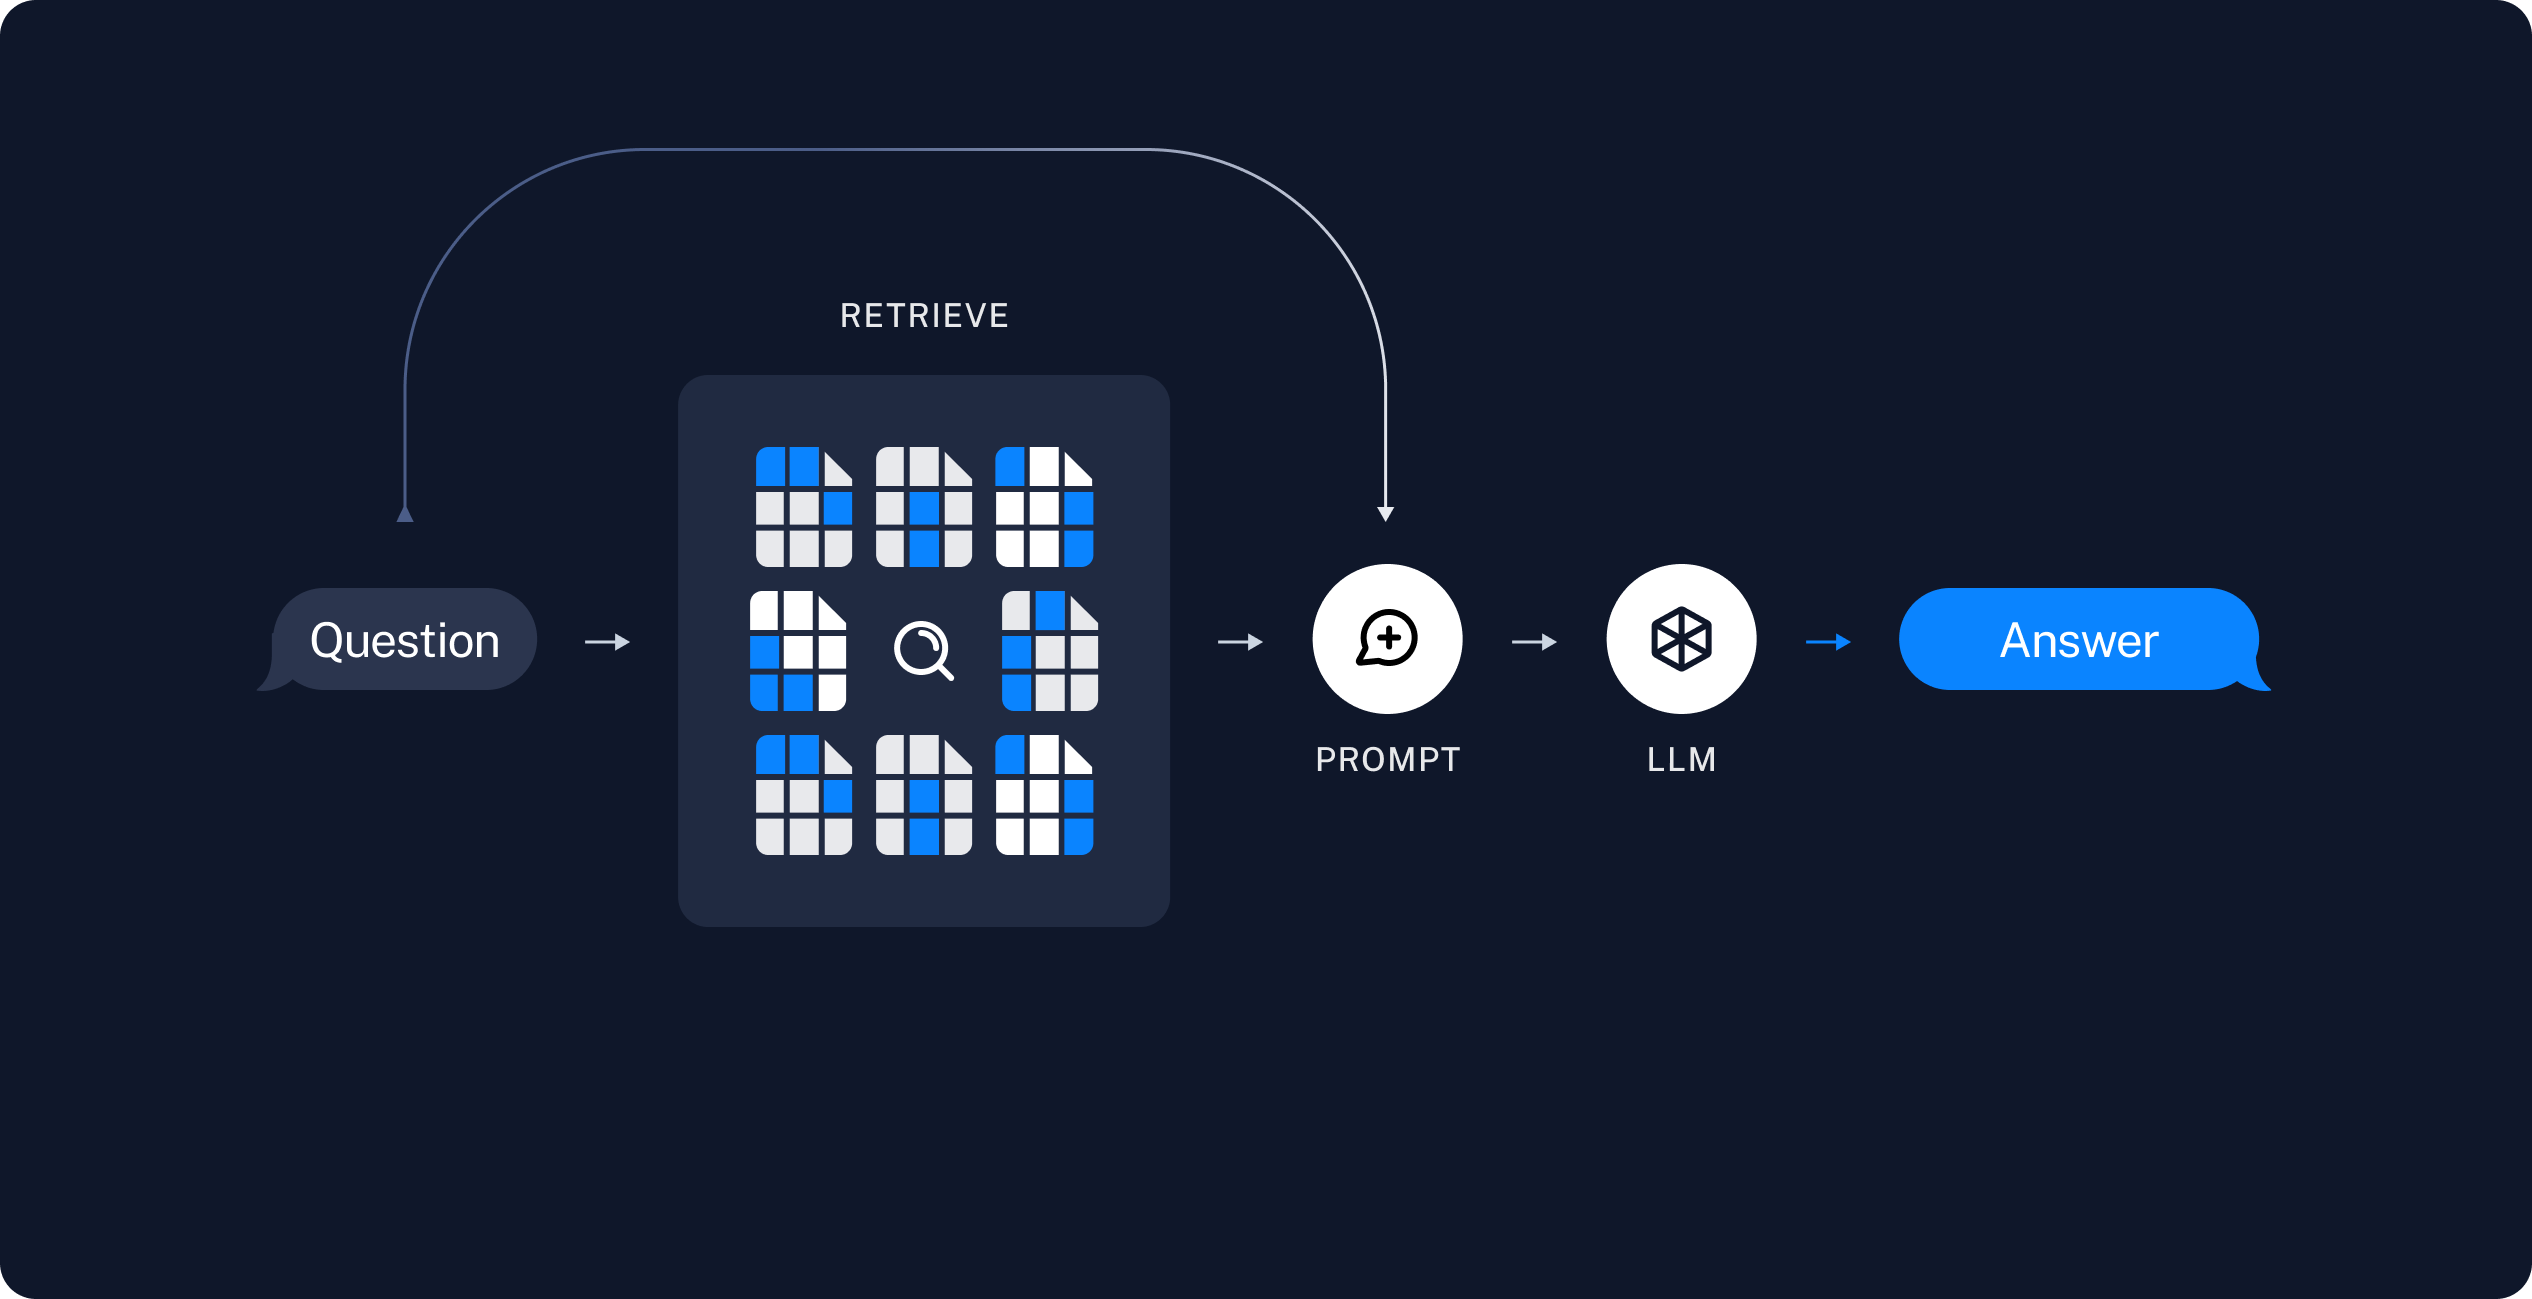

Source: https://python.langchain.com/v0.1/docs/use_cases/question_answering/

In [30]:
#@title Rag & document loading code
import os
import torch

from langchain_community.embeddings import HuggingFaceBgeEmbeddings
from langchain_community.llms import HuggingFacePipeline
from langchain_community.document_loaders import DirectoryLoader
from langchain_huggingface import HuggingFaceEndpoint
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate

from IPython.display import display, Markdown, HTML


def load_documents(folder):
  if os.listdir(folder) == []:
    raise Exception(f"No documents found in {folder}")

  loader = DirectoryLoader(folder, show_progress=True)
  docs_before_split = loader.load()
  text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 700,
    chunk_overlap  = 50,
  )
  docs_after_split = text_splitter.split_documents(docs_before_split)

  avg_doc_length = lambda docs: sum([len(doc.page_content) for doc in docs])//len(docs)
  avg_char_before_split = avg_doc_length(docs_before_split)
  avg_char_after_split = avg_doc_length(docs_after_split)

  print(f'Before split, there were {len(docs_before_split)} documents loaded, with average characters equal to {avg_char_before_split}.')
  print(f'After split, there were {len(docs_after_split)} documents (chunks), with average characters equal to {avg_char_after_split} (average chunk length).')

  return docs_after_split


# Get model API endpoint
hf = HuggingFaceEndpoint(
    repo_id="mistralai/Mistral-7B-Instruct-v0.3",
    temperature = 0.1,
    model_kwargs={"max_length":500}
)

# Make vector db
huggingface_embeddings = HuggingFaceBgeEmbeddings(
    model_name="BAAI/bge-large-en-v1.5",
    model_kwargs={'device':"cuda" if torch.cuda.is_available() else "cpu"},
    encode_kwargs={'normalize_embeddings': True},
)

documents = load_documents('data/')
vectorstore = FAISS.from_documents(documents, huggingface_embeddings)

def make_retrievalQA(prompt_template, top_k=4):
  PROMPT = PromptTemplate(
      template=prompt_template, input_variables=["context", "question"]
  )

  retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 4})
  retrievalQA = RetrievalQA.from_chain_type(
      llm=hf,
      chain_type="stuff",
      retriever=retriever,
      return_source_documents=True,
      chain_type_kwargs={"prompt": PROMPT}
  )
  return retrievalQA

def call_models(query, prompt_template, top_k=4):
    retrievalQA = make_retrievalQA(prompt_template, top_k)

    base_result = hf.invoke(query)
    rag_result = retrievalQA.invoke({"query": query})

    # Display the base result with Markdown formatting
    display(Markdown(f"## Base Result\n{base_result}"))

    # Display the RAG result
    display(Markdown(f"## RAG Result\n{rag_result['result']}"))

    # Display each source document with text wrapping
    for idx, doc in enumerate(rag_result['source_documents'], start=1):
        display(Markdown(f"### Source Document {idx}: {doc.metadata['source']}"))
        # Use HTML to display the content with text wrapping
        display(HTML(f"""
        <div style="
            white-space: pre-wrap;
            word-wrap: break-word;
            background-color: #222222;
            border: 1px solid #ddd;
            color: lightgray;
            padding: 10px;
            border-radius: 5px;
            font-family: monospace;
        ">{doc.page_content}</div>
        """))

    return base_result, rag_result

100%|██████████| 3/3 [00:43<00:00, 14.52s/it]


Before split, there were 3 documents loaded, with average characters equal to 264934.
After split, there were 1380 documents (chunks), with average characters equal to 602 (average chunk length).


## 📖 Assignment

Build the knowledge base and add questions related to the topic. Place the collected documents in the "data" folder. The notebook will automatically parse and preprocess these documents, breaking them down into manageable chunks.

Write a short evaluation for each question. How did the two methods (RAG vs. no RAG) perform.

Feel free to experiment with the **promp template** and the **top_k** argument.

In [32]:
# Make prompt template
prompt_template = """Use the following pieces of context to answer the question at the end. Please follow the following rules:
1. If you don't know the answer, don't try to make up an answer. Just say "I can't find the final answer but you may want to check the following links".
2. If you find the answer, write the answer in a concise way with five sentences maximum.

{context}

Question: {question}

Helpful Answer:
"""


In [51]:
question = "Who was Dorottya Kanizsai during the battle of Mohács?"
base_result, rag_result = call_models(question, prompt_template, top_k=1)

## Base Result


Dorottya Kanizsai was a Hungarian noblewoman during the Battle of Mohács in 1526. She was the wife of István Kanizsai, a prominent Hungarian commander who fought against the Ottoman Empire.

During the battle, István Kanizsai was killed, and Dorottya was captured by the Ottomans. She was taken to Istanbul and became a concubine of Sultan Suleiman the Magnificent.

Dorottya is remembered in Hungarian history for her courage and resilience. She is said to have refused to convert to Islam and was eventually released and returned to Hungary after the death of Suleiman.

Her story is a tragic reminder of the devastating impact of the Ottoman invasions on Hungary and the lives of its people. Despite her personal tragedy, Dorottya's story is also one of determination and survival in the face of adversity.

## RAG Result
Dorottya Kanizsai was a widow of Palatine Perenyi who is known for burying the corpses of the Hungarian soldiers who died during the Battle of Mohács in 1526. She is a well-known figure in historical paintings.

### Source Document 1: data/620151477-1526-Battle-of-Mohacs.txt

### Source Document 2: data/the-fall-of-hungary-mohacs-buda-full.pdf

### Source Document 3: data/the-fall-of-hungary-mohacs-buda-full.pdf

### Source Document 4: data/620151477-1526-Battle-of-Mohacs.txt

In [52]:
question = "How did King Lajos II of Hungary die during the battle of Mohács?"
base_result, rag_result = call_models(question, prompt_template, top_k=1)

## Base Result


King Lajos II of Hungary died during the Battle of Mohács on August 29, 1526. He was killed by a cannonball while trying to rally his troops. The battle was a significant defeat for the Hungarian forces, leading to the Ottoman conquest of large parts of Hungary. The event is considered a turning point in the history of Central Europe.

The Battle of Mohács was fought between the Hungarian forces led by King Lajos II and the Ottoman Empire led by Sultan Suleiman the Magnificent. The Hungarian forces were outnumbered and outmaneuvered, and King Lajos II was killed during the battle. His death led to a power vacuum in Hungary, as he had no surviving male heirs. This vacuum was exploited by the Ottomans, who were able to conquer large parts of Hungary in the following years.

The Battle of Mohács had a profound impact on the history of Central Europe. It marked the beginning of Ottoman rule in Hungary and the decline of the Hungarian Kingdom. It also had significant cultural and political consequences, as it led to the spread of Ottoman influence in the region and the rise of the Habsburg Empire as a major power in Central Europe. The battle is still remembered in Hungary as a national tragedy and a symbol of the country's struggle against foreign invaders.

## RAG Result

King Lajos II of Hungary died during the battle of Mohács in 1526. He was wounded in the head and separated from his attendants. While trying to escape from the battlefield, he was forced backwards from the bank by the pressure of the throng of fugitives, and the weight of his armour sunk him to the bottom of a swollen streamlet near the town of Mohács.

### Source Document 1: data/2060-ArticleText-3744-1-10-20171227-2.pdf

### Source Document 2: data/620151477-1526-Battle-of-Mohacs.txt

### Source Document 3: data/620151477-1526-Battle-of-Mohacs.txt

### Source Document 4: data/the-fall-of-hungary-mohacs-buda-full.pdf

In [53]:
question = "Who were the commanders of the Hungarian army during the battle of Mohács?"
base_result, rag_result = call_models(question, prompt_template, top_k=1)

## Base Result


The Hungarian army at the Battle of Mohács was commanded by King Louis II and his brother John Zápolya. The Ottoman forces were led by Sultan Suleiman the Magnificent.

What was the outcome of the Battle of Mohács?

The Battle of Mohács, fought on August 29, 1526, resulted in a decisive victory for the Ottoman Empire over the Hungarian forces. King Louis II was killed in the battle, and the Ottomans gained control over much of Hungary. The defeat marked the beginning of a long period of Ottoman rule in Hungary and had significant consequences for the region's history.

What was the significance of the Battle of Mohács for Hungary and the Ottoman Empire?

The Battle of Mohács was a significant event in the history of Hungary and the Ottoman Empire. For Hungary, it marked the end of the medieval kingdom and the beginning of a long period of Ottoman rule. The defeat also led to the fragmentation of the Hungarian kingdom, with different regions coming under the control of different rulers.

For the Ottoman Empire, the victory at Mohács was a major milestone in its expansion into Europe. It marked the Ottomans' first major victory over a European power and established their control over much of Hungary. The Ottomans continued to expand their territory in the region in the following decades, reaching their peak of power in the 16th century.

What was the impact of the Battle of Mohács on the region?

The Battle of Mohács had a significant impact on the region. In addition to the fragmentation of the Hungarian kingdom and the Ottoman expansion into Europe, the battle also had consequences for other neighboring countries. For example, the Habsburg Empire, which had been allied with Hungary, was forced to retreat from its territories in Hungary and focus on defending its own borders. The battle also had implications for the balance of power in Europe, as it weakened the Habsburgs and strengthened the Ottomans.

Overall, the Battle of Mohács was a turning point in the history of the region and had far-reaching consequences for the political, economic, and cultural development of Hungary and the Ottoman Empire.

## RAG Result

1. King Lajos II of Hungary
2. Pál Tomori, a Hungarian nobleman and military commander
3. Ferenc Batthyány, a Hungarian nobleman and military commander
4. János Tahy, a Hungarian nobleman and military commander
5. The bishops of Esztergom and Zagreb (names not specified)

### Source Document 1: data/620151477-1526-Battle-of-Mohacs.txt

### Source Document 2: data/the-fall-of-hungary-mohacs-buda-full.pdf

### Source Document 3: data/the-fall-of-hungary-mohacs-buda-full.pdf

### Source Document 4: data/620151477-1526-Battle-of-Mohacs.txt

In [50]:
question = "Who was the Ibrahim pasa during the battle of Mohács?"
base_result, rag_result = call_models(question, prompt_template, top_k=1)


## Base Result


Ibrahim Pasha was not a participant in the Battle of Mohács (1526). He was an Ottoman grand vizier and military commander who lived in the 16th century, but his career peaked after the Battle of Mohács. He was born around 1499 and died in 1536.

Ibrahim Pasha played a significant role in the Ottoman Empire's expansion into Hungary and the Balkans. He was the commander of the Ottoman forces that conquered Belgrade in 1521 and Buda in 1526, both of which were significant Hungarian cities. However, he was not present at the Battle of Mohács, which was fought between the Hungarian forces led by King Louis II and the Ottoman forces led by Sultan Suleiman the Magnificent on August 29, 1526. The battle resulted in a decisive Ottoman victory and the death of King Louis II.

Ibrahim Pasha's military career continued after the Battle of Mohács, and he played a key role in the Ottoman conquest of Rhodes in 1522 and the siege of Vienna in 1529. He was also known for his administrative abilities and was appointed grand vizier in 1523, a position he held until his death in 1536.

## RAG Result
Ibrahim Pasha was the Grand Vizier of the Ottoman Empire during the Battle of Mohács, which took place in 1526. He was born in 1493 on the island of Parga and was killed in Istanbul in 1536. During his thirteen years as a grand vizier, he played an important role in occupying Rhodes and Belgrade, as well as in the Battle of Mohács. He was the commanding officer of many quests initiated by Suleiman the Magnificent. He became very rich and powerful, which many people in the Ottoman empire disliked.

### Source Document 1: data/2060-ArticleText-3744-1-10-20171227-2.pdf

### Source Document 2: data/the-fall-of-hungary-mohacs-buda-full.pdf

### Source Document 3: data/the-fall-of-hungary-mohacs-buda-full.pdf

### Source Document 4: data/620151477-1526-Battle-of-Mohacs.txt